In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

# Communication Graph

In [12]:
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G).toarray()
A = (A > 0) * 1

# Model

\begin{equation}
    I^{(k + 1)} = \underbrace{ \eta I^{(k)} }_{opinion \ momentum} +  \underbrace{ (1 - \eta) }_{permeability}  \underbrace{ \operatorname{tanh} \left(  \langle I^{(k)} \rangle_{\mathcal N}   - I^{(k)}   \right) }_{influence}
\end{equation}

In [296]:
np.array(G.degree)[:,1].argmin()

11

In [337]:
np.random.seed(123)
I   = jnp.sign(np.random.uniform(size = len(A))  * 2 - 1 )
eta = (1 - 1e-2)
a   = 3e-2
B   = A / A.mean(axis = 1)[:,None]

Is = []
tau  = 1e-3
for i in range(500):
    I += tau * ( (1-eta) * jnp.tanh( a * (A @ I - I) ) + eta * I)
    Is.append(I[11])

Is = jnp.array(Is)

Is.shape

(500,)

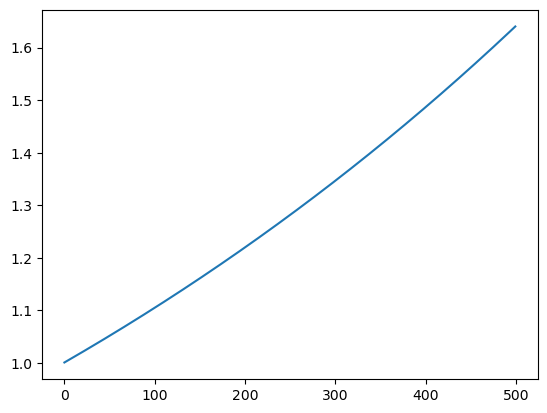

In [338]:
plt.plot(Is)
plt.show()